In [1]:
# Import Libraries
import numpy as np #Numerical Analysis
import pandas as pd # Data preprocessing
 # Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
# for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#evaluation metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dataset
data = pd.read_csv(r"heart - WMDI.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#For better understanding and flow of analysis, i will rename some of the columns
data.columns = ['age', 'sex', 'chest_pain_type','resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'maximum_heart',
                'excercise_induced_agina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
maximum_heart,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
excercise_induced_agina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


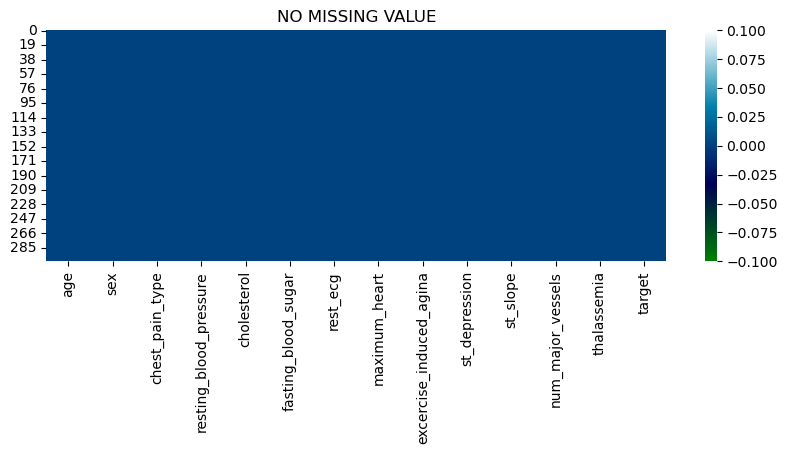

In [11]:
#confirming missing value
data.isna().sum()

#visualize to confirm
plt.figure(figsize=(10,3))
sns.heatmap(data.isna(), cbar=True, cmap="ocean")
plt.title("NO MISSING VALUE")
plt.show()

# EDA

## Univariate analysis

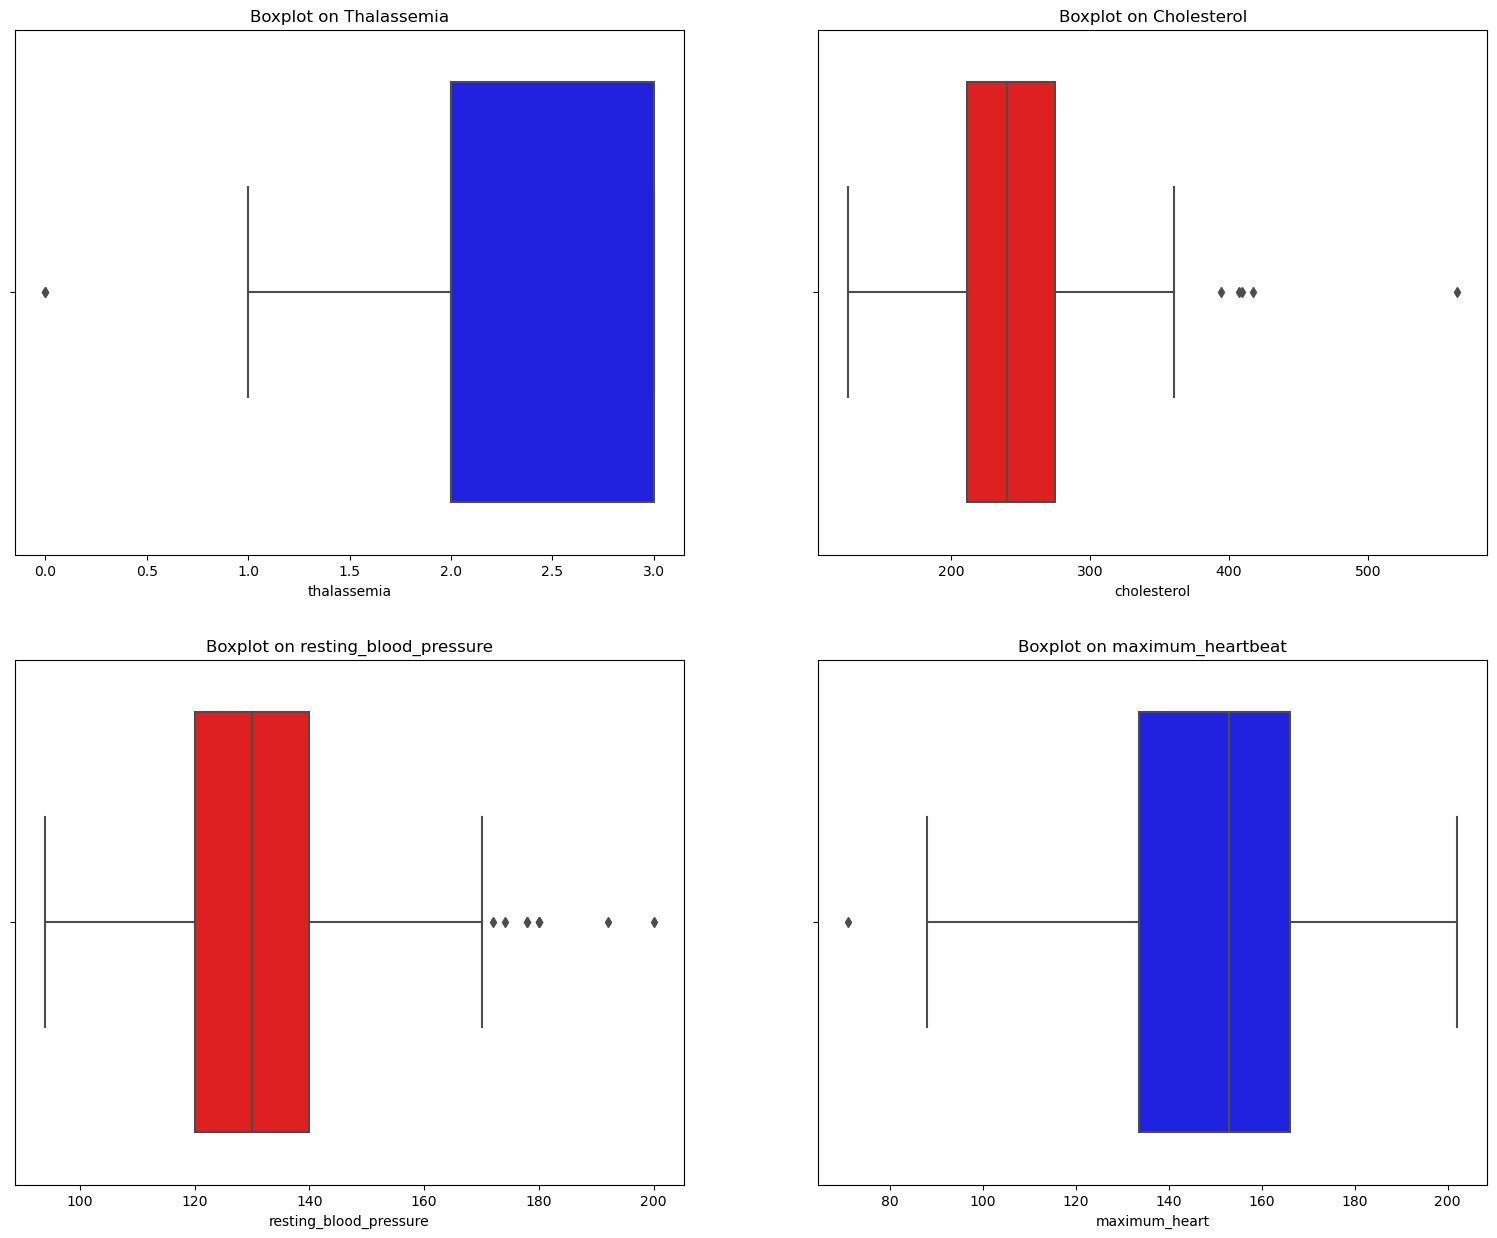

In [12]:
#checking for outliers, using subplots
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(19,15))  

#subplot1
sns.boxplot(x="thalassemia", data=data, color='blue', ax= axes[0,0])
axes[0,0].set_title('Boxplot on Thalassemia')

#subplot1
sns.boxplot(x="cholesterol", data=data, color='r', ax= axes[0,1])
axes[0,1].set_title('Boxplot on Cholesterol')

#subplot1r
sns.boxplot(x="resting_blood_pressure", data=data, color='r', ax= axes[1,0])
axes[1,0].set_title('Boxplot on resting_blood_pressure')

#subplot4
sns.boxplot(x="maximum_heart", data=data, color='blue', ax= axes[1,1])
axes[1,1].set_title('Boxplot on maximum_heartbeat');


In [13]:
#assign age into age_group
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age<=55:
        return "Adult(<=55)"
    elif age<=65:
            return "Old Adult(<=65)"
    else:
            return "Elderly(>65)"
data["age_bracket"] = data["age"].apply(age_bracket)


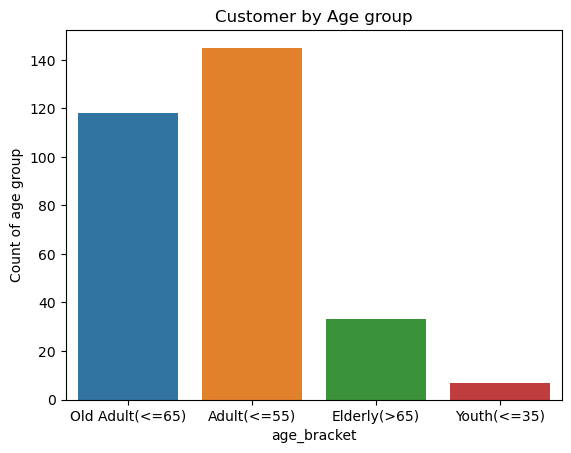

In [14]:
#visualize count of customer by age group

sns.countplot(x="age_bracket", data=data)
plt.title("Customer by Age group")
plt.ylabel("Count of age group");

# Narration

##### Customer within the range of Adult are the highest, followed by Old Adult, then Elderly, and lastly Youth

In [20]:
#convert sex code to gender
def gender(sex):
    if sex == 0:
        return "Female"
    else:
        return "Male"
data["gender"] = data["sex"].apply(gender)

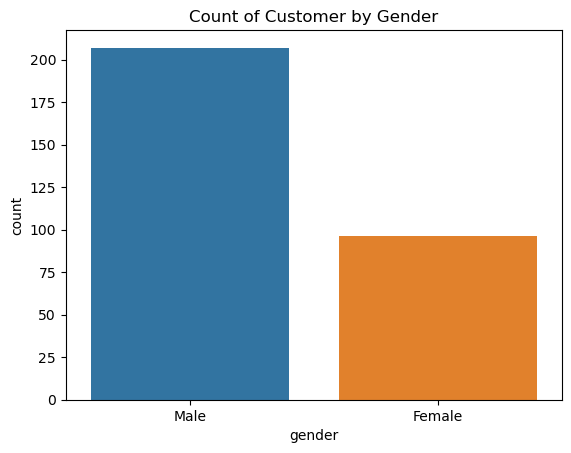

In [21]:
sns.countplot(x="gender", data=data)
plt.title("Count of Customer by Gender");

# Narration

##### Male customer are much more than that of female

In [22]:
#assign chest pain type into category

def cp_type(chest_pain_type):
    if chest_pain_type == 1:
        return "Typical Angica"
    elif chest_pain_type == 2:
        return "Atypical Angica"
    elif chest_pain_type == 3:
        return "Non Angina"
    else:
            return "Asymptomatic"
data["cp_type"] = data["chest_pain_type"].apply(cp_type)


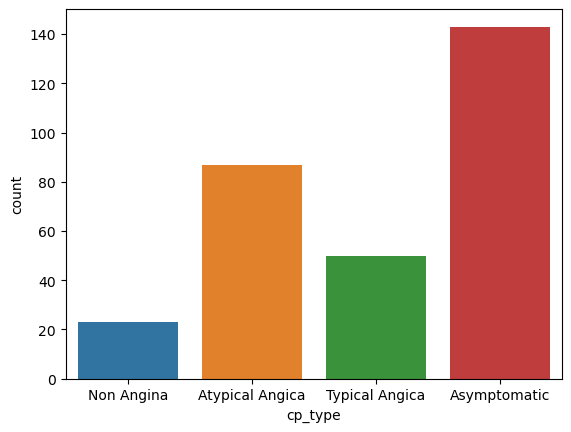

In [23]:
sns.countplot(x="cp_type", data=data); 

# Narration

#### Customer within the range of Asymptomatic are the highest, followed by Atypical Angica, then Typical Angica, and lastly Non Angina

Yes    165
No     138
Name: Label, dtype: int64


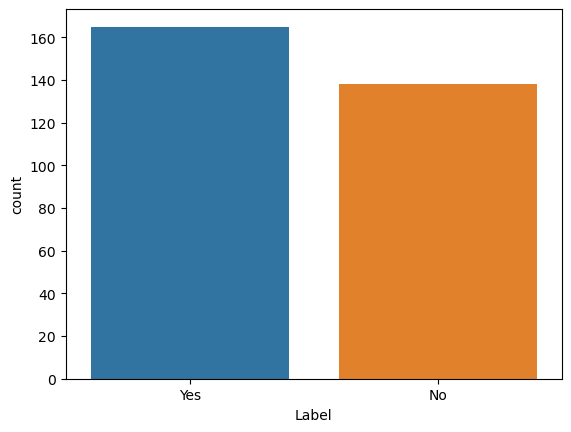

In [15]:
#customer with heart diseases 1=yes, 0=no

def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
data["Label"] = data["target"].apply(label)


print (data['Label'].value_counts())

sns.countplot(x="Label", data=data);

## Bivariate Analysis

Yes    165
No     138
Name: Label, dtype: int64
Adult(<=55)        145
Old Adult(<=65)    118
Elderly(>65)        33
Youth(<=35)          7
Name: age_bracket, dtype: int64


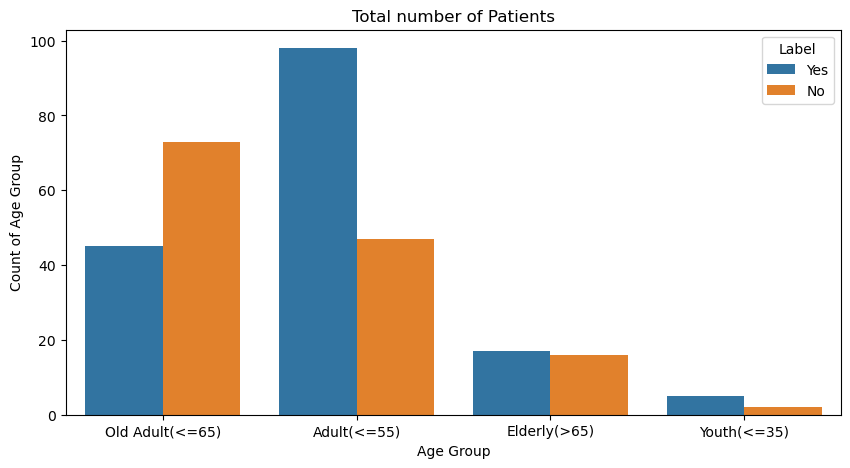

In [16]:
#Count of Age group by Heart Disease Target Feature

print (data["Label"].value_counts())
print (data["age_bracket"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x="age_bracket", data=data, hue="Label")
plt.ylabel("Count of Age Group")
plt.xlabel("Age Group")
plt.title("Total number of Patients");

1    207
0     96
Name: sex, dtype: int64
Yes    165
No     138
Name: Label, dtype: int64


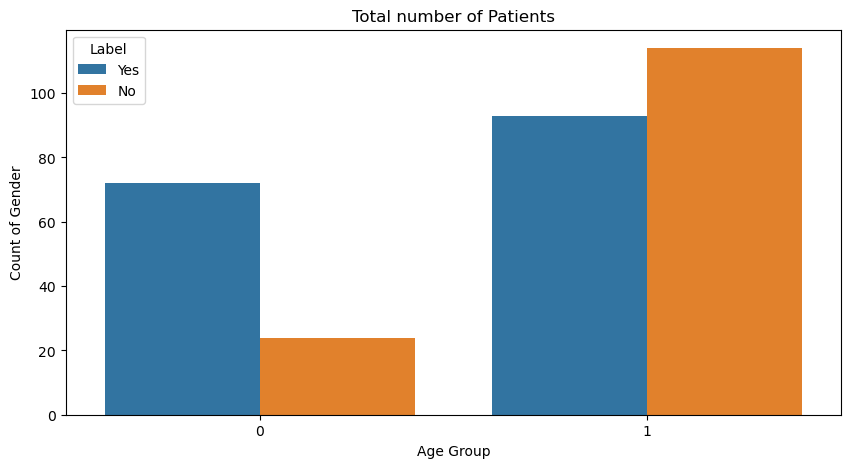

In [19]:
#Count of gender by Heart Disease Target Feature

print (data["sex"].value_counts())
print (data["Label"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x="sex", data=data, hue="Label")
plt.ylabel("Count of Gender")
plt.xlabel("Age Group")
plt.title("Total number of Patients");

# Narration
#### Female patients tend to have heart diseases than the male counterpart in the comparative view of the data. But in figure the male tends to be more.

Yes    165
No     138
Name: Label, dtype: int64
0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64


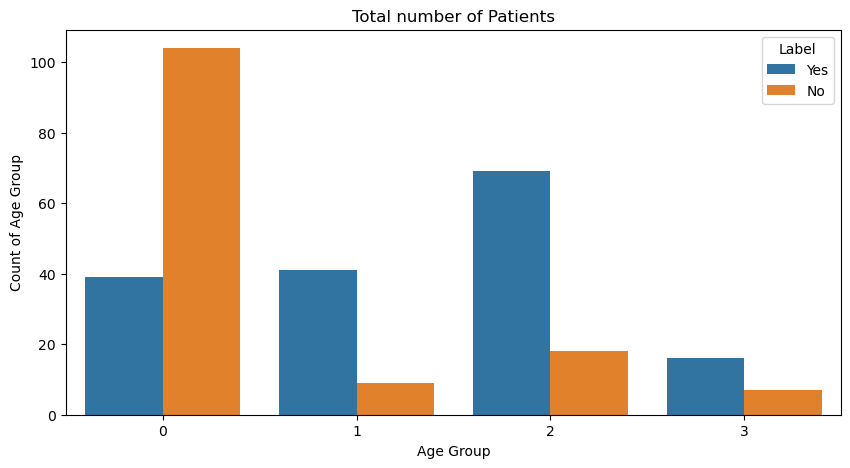

In [22]:
#Count of Chest pain type by Heart Disease Target Feature

print (data["Label"].value_counts())
print (data["chest_pain_type"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x="chest_pain_type", data=data, hue="Label")
plt.ylabel("Count of Age Group")
plt.xlabel("Age Group")
plt.title("Total number of Patients");

## Multivariate Analysis

<Figure size 900x500 with 0 Axes>

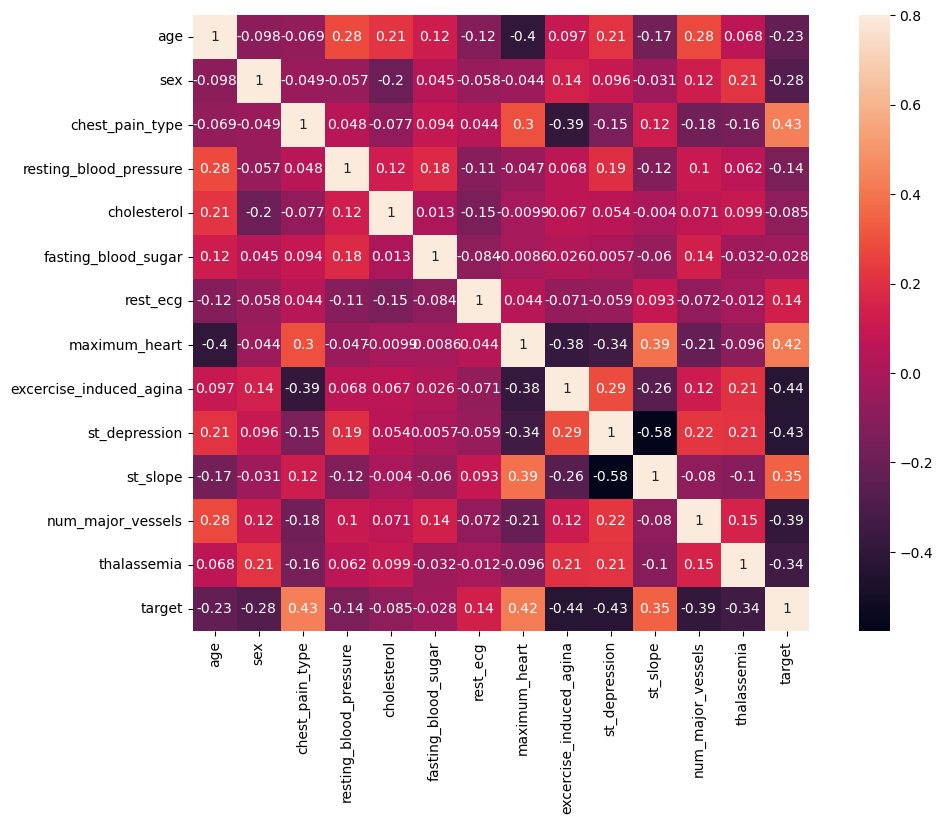

In [24]:
a = data.corr()

plt.figure(figsize=(9,5))
f, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(a, annot=True, vmax=.8, square=True)
plt.show()

# Feature Engineering/Data Pre-processing

In [25]:
data1 = data[["age", "sex", 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'maximum_heart',
       'excercise_induced_agina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia']]

label = data[["target"]]

In [26]:
data1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
maximum_heart                int64
excercise_induced_agina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [27]:
#Dealing with outliers - 'resting_blood pressure, 'cholesterol', 'thalassemia

# Normalize the data
scaler = MinMaxScaler()

data1["Scaled_RBP"] = scaler.fit_transform(data1[['resting_blood_pressure']].values.reshape(-1, 1))
data1["scaled chol"] = scaler.fit_transform(data1[['cholesterol']].values.reshape(-1, 1))
data1["scaled_thal"] = scaler.fit_transform(data1[['thalassemia']].values.reshape(-1, 1))
data1["scaled_max_heart_rate"] = scaler.fit_transform(data1[['maximum_heart']].values.reshape(-1, 1))


data1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'maximum_heart'], axis=1, inplace=True)

data1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,excercise_induced_agina,st_depression,st_slope,num_major_vessels,Scaled_RBP,scaled chol,scaled_thal,scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


# Machine Learning

In [28]:
#split into training set

X_train, X_test, y_train, y_test = train_test_split(data1, label, test_size=0.2, random_state=42)

In [32]:
#logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print ("_________________________")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
_________________________
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


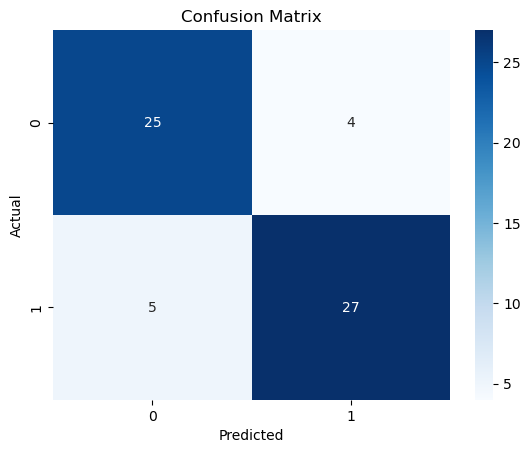

In [33]:
# Create a confusion matrix
lcm = (confusion_matrix(y_test, ly_pred))

#visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel ("Predicted")
plt.ylabel ("Actual" )
plt.title("Confusion Matrix")
plt.show()

In [34]:
#Random Forest Classifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

print("Random Forest Classifier")
print ("_________________________")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
_________________________
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1-score: 0.84375
AUC-ROC: 0.8356681034482758


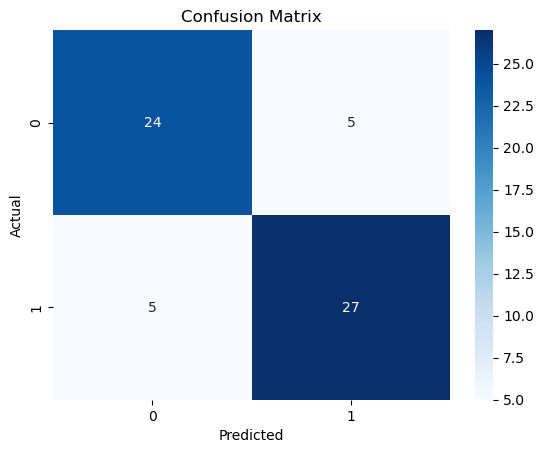

In [35]:
# Create a confusion matrix
rcm = (confusion_matrix(y_test, rfy_pred))

#visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel ("Predicted")
plt.ylabel ("Actual" )
plt.title("Confusion Matrix")
plt.show()

In [42]:
#7 Machine Learning Evaluation metrics will be applied to the dataset


classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), "Random Forest"], 
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(random_state = 42), "Decison Tree"],
               [LogisticRegression(), "Logistic Regression"]]

In [43]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = [str(round(a_score*100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score*100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score*100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score*100, 2)) + '%']
    
    if model_name != classifiers[-1][1]:
        print("")

In [52]:
print ("Accuracy Score")
accuracy_list = pd.DataFrame(acc_list)

accuracy_list.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,Naive Bayes,Decison Tree,Logistic Regression
0,81.97%,83.61%,75.41%,88.52%,86.89%,85.25%,85.25%


### Analysis of the Peterside Hospital Heart Disease Prediction Project


####    XGB Classifier: 81.97%
####    Random Forest: 83.61%
####    K-Nearest Neighbors: 75.41%
####    SGD Classifier: 88.52%
####    Naive Bayes: 86.89%
####    Decision Tree: 85.25%
####    Logistic Regression: 85.25%